In [1]:
library(pheatmap)

In [2]:
df = read.table("gene_expression_v2.Rin", sep = '\t', header = TRUE)
#subset$de <- as.character(subset$de)

# hormone signaling and biosynthesis

In [3]:
#subdf = subset(df, path=='BR signaling')
expdf = df[c('WTHerm_1','WTHerm_2','WTHerm_3','her19_1','her19_2','her19_3','Male_1','Male_2','Male_3')]

expmx = as.matrix(expdf, rownames=TRUE)
rownames(expmx) = df$gene
#expmx = log(expmx+1)

anndf = df[c('her19_v_herm', 'male_v_her19', 'male_v_herm', 'path')]
rownames(anndf) = df$gene

In [4]:
palette = colorRampPalette(c('#FFFFE5', '#FFF7BC', '#FEE391', '#FEC44F', '#FB9A29', '#EC7014', '#CC4C02', '#993404', '#662506'))(100)

my_colour = list(
    path = c('BR signaling' = '#66CCEE', 
        'BR biosynthesis' = '#228833', 
        'GA signaling' = '#CCBB44', 
        'GA biosynthesis' = '#AA3377'), 
#        'ABA signaling' = '#CC6677', 
#        'ABA biosynthesis' = '#882255'),       
    male_v_herm = c('DE up' = '#B2182B', 'not de' = '#F7F7F7', 'DE down' = '#2166AC', 'not expressed' = '#FFEE99' ),
    male_v_her19 = c('DE up' = '#B2182B', 'not de' = '#F7F7F7', 'DE down' = '#2166AC', 'not expressed' = '#FFEE99' ),
    her19_v_herm = c('DE up' = '#B2182B', 'not de' = '#F7F7F7', 'DE down' = '#2166AC', 'not expressed' = '#FFEE99' )
    
)

In [5]:
save_pheatmap_pdf <- function(x, filename, width=7, height=10) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

png 
  2

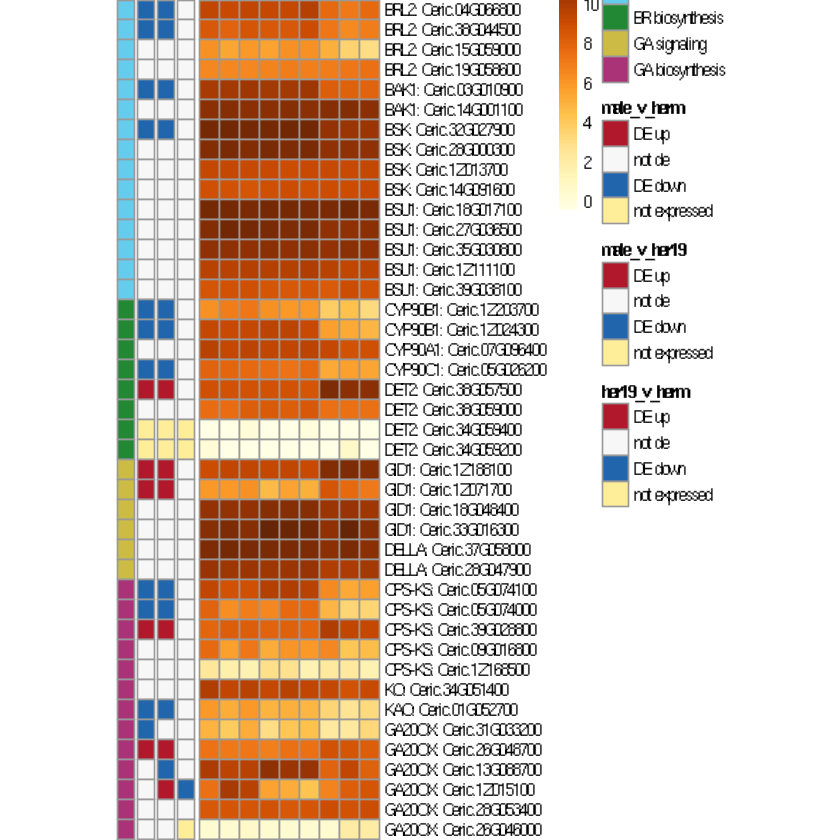

In [6]:
fig = pheatmap(expmx, main = 'Hormone signaling and biosynthesis\nrlog(normalized counts)', 
        cellwidth = 12, cellheight = 12, cluster_cols = FALSE, cluster_rows = FALSE, 
        annotation_colors = my_colour, annotation_row = anndf, color = palette)
save_pheatmap_pdf(fig, "hormone_sigbiosyn_heatmap.pdf")
